# Image Captioning using Deep Learning: Assignment-2

*  In this assignment, we will build a classifier for MNIST from using [PyTorch](https://pytorch.org/docs/stable/index.html). 

*   No limitations on your model this time, just don't use CNNs now, that's up next week.

**Feel free to redefine any pre-written cells below, just make sure to properly explain your work in Markdown and don't change the dataset**

## Import libraries here
PyTorch, NumPy, Matplotlib, ...
Even when equipped with PyTorch, NumPy and Matplotlib make your work easier for visualization etc.

Also remember to **initialize the seed** for reproducibility of results, both for NumPy & PyTorch.

In [43]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
import random
import torch.utils.data as data
seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


## Load *Dataset*
**DON'T CHANGE THIS CODE**.

In [31]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=True)

# Your Code from here...

In [32]:

# split the train set into two
seed = torch.Generator().manual_seed(42)
train_set, valid_set = data.random_split(trainset, [48000, 12000], generator=seed)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10,
                                          shuffle=True, num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_set,batch_size=10,shuffle=True,num_workers=2)
X_train,y_train=next(iter(train_loader))
X_valid,y_valid=next(iter(valid_loader))

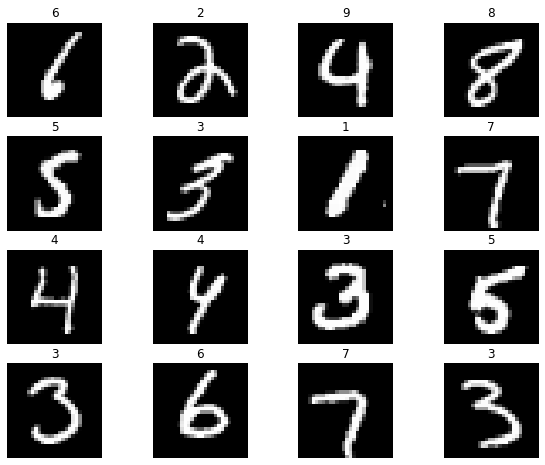

In [33]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
figure = plt.figure(figsize=(10, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


## ```nn.Module``` for your model
In this segment, define a class for your model, it has to inherit from the ```nn.Module``` class. You must define two functions here - ```__init__``` and ```forward```, again pretty self-explanatory. Helper functions can also be implemented, your choice!

Look into the following ```torch``` layers and combine them to form your network, you can find more [here](https://pytorch.org/docs/stable/nn.html) -
- [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [```nn.ReLU```](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
- [```nn.BatchNorm1d```](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)


In [34]:
# define a child class of nn.Module for your model
# specify the architecture here itself
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 400) 
        self.linear2 = nn.Linear(400, 128) 
        self.linear3 = nn.Linear(128, 84)
        self.linear4 = nn.Linear(84, 10)
        self.relu = nn.ReLU()

    def forward(self, img): 
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        x = self.relu(self.linear4(x))
        return x

net=Net()
print(net)

Net(
  (linear1): Linear(in_features=784, out_features=400, bias=True)
  (linear2): Linear(in_features=400, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=84, bias=True)
  (linear4): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
)


## Training loop
You can write a training loop but usually writing it within a function helps so that you can train in multiple passes with just one function call if you still don't see convergence of the loss. ```display_step``` is for you to display results on the validation set (which you must not have trained upon).

You will need to use ```zero_grad()```, ```backward()``` and multiple such functions here. Look for them in the tutorials given.

In [35]:
def train(model, optimizer, criterion, train_loader,display_step=None):
    # loop over the dataset multiple times

      
    for epoch in range(10):
      model.train()

      for data in train_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()  
         

    print('Finished Training')


## Prediction & Accuracy
Prediction function should predict outputs using your trained model for a given **NumPy array** ```X_test``` and the output should be another **NumPy array**.

The accuracy function would be the same as before.

In [36]:
def predict(model, X_test):
  with torch.no_grad():
    y_pred_tensor=torch.argmax(model(X_test), axis=1)
    return y_pred_tensor.numpy()
  

In [37]:
def accuracy(pred, labels):
  correct = 0
  for i in range(len(pred)):
    if pred[i]==labels[i]:
      correct=correct+1
    else:
      correct=correct+0
    accu = correct/len(pred)
    return accu
  

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [38]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
train(net, optimizer, criterion, train_loader,display_step=None)

Finished Training


## Run your model for the validation dataset
Use your trained model to get predictions for the validation dataset you split earlier.

In [39]:
correct = 0
total = 0

with torch.no_grad():
    for data in valid_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.861


## Submission
To submit your solution, you will need to make a file with name ```model.py``` containing imports necessary to write the model class and the model class itself. It shouldn't do anything else when run. Other than this, save the trained model in a file named ```ass_2.pt```. When you are done with the assignment, commit the updated notebook, the ```model.py``` class file and the ```ass_2.pt``` model-weights file to the repository.

In [41]:
from google.colab import files
torch.save(net, 'ass_2.pt')
files.download('ass_2.pt') # download the file from the Colab session for submission

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Check if it got saved right!

In [42]:
# load the model, use predict function

predict(net,X_valid)


array([8, 4, 0, 8, 7, 7, 6, 7, 2, 7])